In [300]:
import sys
sys.path.append('../')
import pandas as pd
import plotly.graph_objects as go
import datetime as dt
from infrastructure.instrument_collection import instrumentCollection as ic
import matplotlib.pyplot as plt

In [103]:
pair_name = "EUR_USD"
granularity="H4"
df = pd.read_pickle(f"../data/{pair_name}_{granularity}.pkl")

In [104]:
df = pd.DataFrame(df)

In [105]:
df.shape

(499, 14)

In [106]:
df.head()

,time,volume,mid_o,mid_h,mid_l,mid_c,bid_o,bid_h,bid_l,bid_c,ask_o,ask_h,ask_l,ask_c
0,2024-07-24 21:00:00+00:00,6356,1.08412,1.08422,1.08349,1.08396,1.08393,1.08414,1.08341,1.08389,1.08431,1.08431,1.08357,1.08403
1,2024-07-25 01:00:00+00:00,11653,1.08396,1.08440,1.08363,1.08400,1.08388,1.08433,1.08355,1.08392,1.08404,1.08448,1.08371,1.08409
2,2024-07-25 05:00:00+00:00,22065,1.08402,1.08578,1.08284,1.08462,1.08395,1.08570,1.08276,1.08454,1.08410,1.08586,1.08291,1.08469
3,2024-07-25 09:00:00+00:00,24687,1.08460,1.08590,1.08364,1.08498,1.08452,1.08582,1.08356,1.08490,1.08468,1.08597,1.08371,1.08506
4,2024-07-25 13:00:00+00:00,30177,1.08498,1.08648,1.08303,1.08620,1.08491,1.08640,1.08295,1.08612,1.08506,1.08656,1.08310,1.08627


In [117]:
df_plot = df[:100]

fig = go.Figure()

In [148]:
df.columns

Index(['time', 'volume', 'mid_o', 'mid_h', 'mid_l', 'mid_c', 'bid_o', 'bid_h',
       'bid_l', 'bid_c', 'ask_o', 'ask_h', 'ask_l', 'ask_c'],
      dtype='object')

In [169]:
df_ma = df[['time', 'mid_o', 'mid_h', 'mid_l', 'mid_c']]

In [170]:
df_ma.head()

,time,mid_o,mid_h,mid_l,mid_c
0,2024-07-24 21:00:00+00:00,1.08412,1.08422,1.08349,1.08396
1,2024-07-25 01:00:00+00:00,1.08396,1.08440,1.08363,1.08400
2,2024-07-25 05:00:00+00:00,1.08402,1.08578,1.08284,1.08462
3,2024-07-25 09:00:00+00:00,1.08460,1.08590,1.08364,1.08498
4,2024-07-25 13:00:00+00:00,1.08498,1.08648,1.08303,1.08620


In [171]:
periods = [10,20,50,100,200]

In [172]:
# Calculate the 10-period moving average
for period in periods:
    df_ma[f"MA{period}"] = df_ma["mid_c"].rolling(period).mean()
# df_ma['MA10'] = df_ma['mid_c'].rolling(10).mean()

# Drop rows with NaN values (avoid inplace=True to prevent warnings)
df_ma = df_ma.dropna().copy()
df_ma.reset_index(inplace=True, drop=True)


C:\Users\PMLS\AppData\Local\Temp\ipykernel_5136\164746919.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\PMLS\AppData\Local\Temp\ipykernel_5136\164746919.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\PMLS\AppData\Local\Temp\ipykernel_5136\164746919.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [173]:
df_ma.head()

,time,mid_o,mid_h,mid_l,mid_c,MA10,MA20,MA50,MA100,MA200
0,2024-09-10 01:00:00+00:00,1.10308,1.10406,1.10306,1.10401,1.105634,1.107951,1.107254,1.109863,1.099945
1,2024-09-10 05:00:00+00:00,1.10400,1.10496,1.10336,1.10379,1.105245,1.107745,1.107066,1.109897,1.100044
2,2024-09-10 09:00:00+00:00,1.10378,1.10440,1.10266,1.10298,1.104687,1.107509,1.106855,1.109899,1.100139
3,2024-09-10 13:00:00+00:00,1.10296,1.10350,1.10153,1.10267,1.104122,1.107147,1.106739,1.109896,1.100230
4,2024-09-10 17:00:00+00:00,1.10268,1.10279,1.10184,1.10194,1.103559,1.106781,1.106609,1.109875,1.100314


In [174]:
def add_MA(period, df, fig):
    """
    Adds a moving average (MA) line to the figure for a given period.

    Parameters:
    - period (int): The moving average period.
    - df (DataFrame): The data containing the moving average column.
    - fig (Figure): The Plotly figure to which the line will be added.
    """
    fig.add_trace(go.Scatter(
        x=df["time"],
        y=df[f"MA{period}"],
        line=dict(width=2),
        line_shape='spline',
        name=f'MA {period}'
    ))

def create_plot(df, periods):
    """
    Creates and displays a candlestick chart with multiple moving averages.

    Parameters:
    - df (DataFrame): The data containing candlestick and moving averages.
    - periods (list[int]): List of moving average periods to add to the chart.
    """
    # Filter out weekends from the dataset for alignment
    df = df[df["time"].dt.weekday < 5]  # Keep only weekdays

    fig = go.Figure()

    # Add candlestick chart
    fig.add_trace(go.Candlestick(
        x=df["time"],
        open=df["mid_o"],
        high=df["mid_h"],
        low=df["mid_l"],
        close=df["mid_c"]
    ))

    # Add moving averages dynamically for each period
    for period in periods:
        add_MA(period, df, fig)

    # Update layout with configuration
    fig.update_layout(
        width=900,
        height=600,
        margin=dict(l=10, r=10, b=10, t=10),
        title="Candlestick Chart with Moving Averages",
        xaxis_title="Date",
        yaxis_title="Price",
        xaxis=dict(
            rangebreaks=[
                dict(bounds=["sat", "mon"])  # Skip weekends on the x-axis
            ]
        ),
        xaxis_rangeslider_visible=False  # Disable range slider if not needed
    )

    # Show the chart
    fig.show()


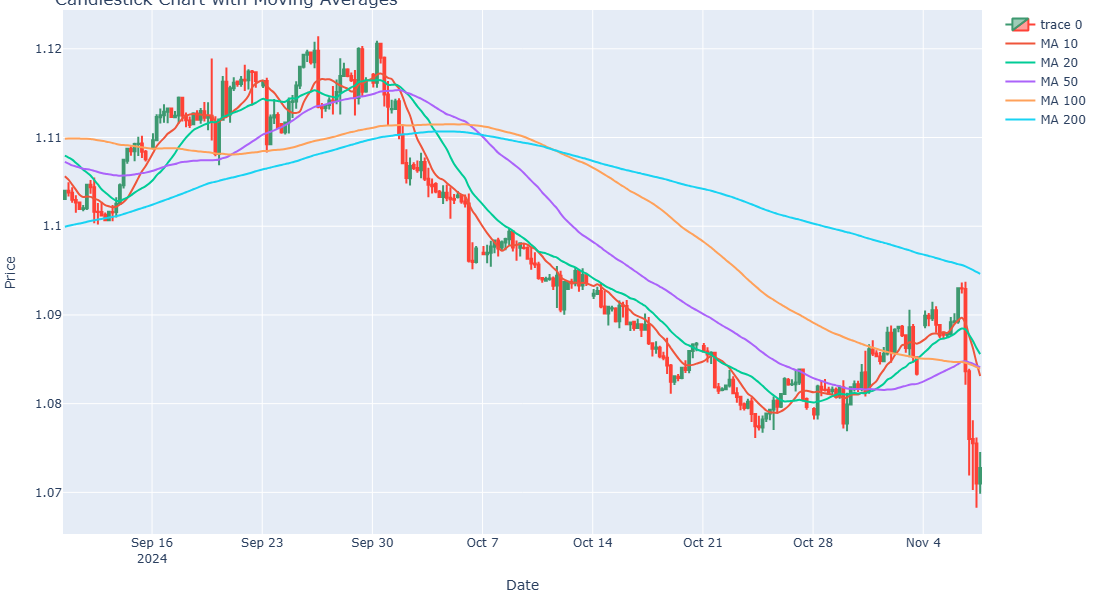

In [207]:
create_plot(df_ma[:250], periods)


## Let's find the delta(signal for buy or sell)

In [191]:
MA_S = 'MA10'
MA_L = 'MA20'
BUY = 1
SELL = -1
NONE = 0

In [194]:
df_na = df_ma[['time', 'mid_o', 'mid_h', 'mid_l', 'mid_c', MA_S, MA_L]].copy()

In [195]:
df_na.head()

,time,mid_o,mid_h,mid_l,mid_c,MA10,MA20
0,2024-09-10 01:00:00+00:00,1.10308,1.10406,1.10306,1.10401,1.105634,1.107951
1,2024-09-10 05:00:00+00:00,1.10400,1.10496,1.10336,1.10379,1.105245,1.107745
2,2024-09-10 09:00:00+00:00,1.10378,1.10440,1.10266,1.10298,1.104687,1.107509
3,2024-09-10 13:00:00+00:00,1.10296,1.10350,1.10153,1.10267,1.104122,1.107147
4,2024-09-10 17:00:00+00:00,1.10268,1.10279,1.10184,1.10194,1.103559,1.106781


In [202]:
df_na['DELTA'] = df_na[MA_S] - df_na[MA_L]
df_na['DELTA_PREV'] = df_na['DELTA'].shift(1)

In [213]:
df_na.head()

,time,mid_o,mid_h,mid_l,mid_c,MA10,MA20,DELTA,DELTA_PREV,TRADE
0,2024-09-10 01:00:00+00:00,1.10308,1.10406,1.10306,1.10401,1.105634,1.107951,-0.002317,NaN,0
1,2024-09-10 05:00:00+00:00,1.10400,1.10496,1.10336,1.10379,1.105245,1.107745,-0.002500,-0.002317,0
2,2024-09-10 09:00:00+00:00,1.10378,1.10440,1.10266,1.10298,1.104687,1.107509,-0.002822,-0.002500,0
3,2024-09-10 13:00:00+00:00,1.10296,1.10350,1.10153,1.10267,1.104122,1.107147,-0.003025,-0.002822,0
4,2024-09-10 17:00:00+00:00,1.10268,1.10279,1.10184,1.10194,1.103559,1.106781,-0.003222,-0.003025,0


In [209]:
# Let's now detect some trades
def detect_trade(row):
    if row.DELTA > 0 and row.DELTA_PREV < 0:
        return BUY
    elif row.DELTA < 0 and row.DELTA_PREV > 0:
        return SELL
    else:
        return NONE

In [212]:
df_na['TRADE'] = df_na.apply(detect_trade, axis=1)

In [277]:
df_trades = df_na[df_na['TRADE'] != 0]
df_trades.head()

,time,mid_o,mid_h,mid_l,mid_c,MA10,MA20,DELTA,DELTA_PREV,TRADE
18,2024-09-13 01:00:00+00:00,1.10874,1.10902,1.10794,1.10844,1.103845,1.103481,0.000364,-0.000072,1
42,2024-09-19 01:00:00+00:00,1.10814,1.11214,1.10686,1.11202,1.111761,1.111946,-0.000185,0.000084,-1
46,2024-09-19 17:00:00+00:00,1.11556,1.11679,1.11524,1.11616,1.113015,1.112803,0.000212,-0.000020,1
59,2024-09-23 21:00:00+00:00,1.11153,1.11162,1.11043,1.11058,1.113912,1.114031,-0.000119,0.000374,-1
67,2024-09-25 05:00:00+00:00,1.11959,1.11966,1.11822,1.11849,1.115268,1.115154,0.000114,-0.000361,1


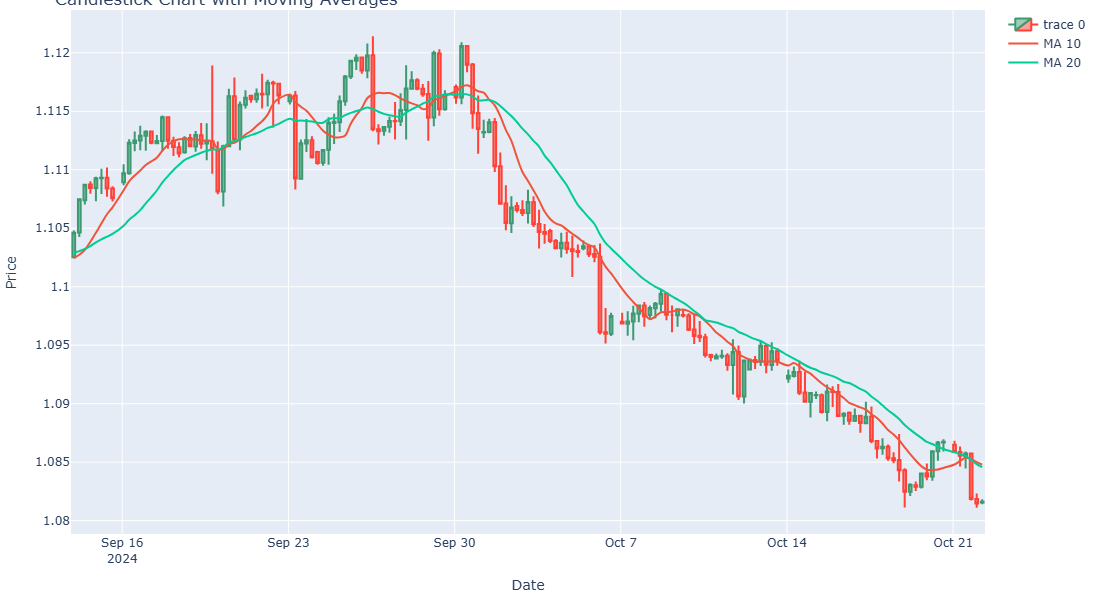

In [292]:
create_plot(df_na.iloc[15:180], [10, 20])

In [ ]:
def is_profitable(row):
    if row['mid_o_shift'].isna():
        return None
    if row['DELTA']

In [278]:
# Ok, now let's see how many trades are successfull in this way
#df_trades['mid_o_shift'] = df_trades['mid_o'].shift(1)

In [224]:
def check_trade_profitability(row):
    if pd.isna(row['mid_o_shift']):  # Check for NaN using pd.isna()
        return None
    if row['TRADE'] == -1:
        if row['mid_c'] - row['mid_o_shift'] > 0:
            return True
        else:
            return False
    elif row['TRADE'] == 1:
        if row['mid_c'] - row['mid_o_shift'] < 0:
            return True
        else:
            return False
    

In [279]:
#df_trades['is_profitable'] = df_trades.apply(check_trade_profitability, axis=1)
#df_trades['is_profitable'] = df_trades['is_profitable'].shift(-1)

##### Let's calculate in pips value as well that how many we are making or losing in pips

In [280]:
ic.LoadInstruments('../data')

In [281]:
ins_data = ic.instruments_dict[pair_name].__dict__


In [285]:
#df_trades['DIFF'] = (df_trades['mid_c'] - df_trades['mid_o_shift']).shift(-1)
df_trades['DIFF'] = df_trades.mid_c.diff().shift(-1)

C:\Users\PMLS\AppData\Local\Temp\ipykernel_5136\3179632861.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [288]:
df_trades['GAIN'] = (df_trades['DIFF'] / ins_data['pipLocation']) * df['TRADE']

C:\Users\PMLS\AppData\Local\Temp\ipykernel_5136\2959218558.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [289]:
df_trades.head(10)

,time,mid_o,mid_h,mid_l,mid_c,MA10,MA20,DELTA,DELTA_PREV,TRADE,DIFF,GAIN
18,2024-09-13 01:00:00+00:00,1.10874,1.10902,1.10794,1.10844,1.103845,1.103481,0.000364,-0.000072,1,0.00358,35.8
42,2024-09-19 01:00:00+00:00,1.10814,1.11214,1.10686,1.11202,1.111761,1.111946,-0.000185,0.000084,-1,0.00414,-41.4
46,2024-09-19 17:00:00+00:00,1.11556,1.11679,1.11524,1.11616,1.113015,1.112803,0.000212,-0.000020,1,-0.00558,-55.8
59,2024-09-23 21:00:00+00:00,1.11153,1.11162,1.11043,1.11058,1.113912,1.114031,-0.000119,0.000374,-1,0.00791,-79.1
67,2024-09-25 05:00:00+00:00,1.11959,1.11966,1.11822,1.11849,1.115268,1.115154,0.000114,-0.000361,1,-0.00203,-20.3
78,2024-09-27 01:00:00+00:00,1.11692,1.11733,1.11625,1.11646,1.115184,1.115661,-0.000477,0.000124,-1,0.00063,-6.3
83,2024-09-29 21:00:00+00:00,1.11595,1.11739,1.11578,1.11709,1.116620,1.116503,0.000117,-0.000117,1,-0.00679,-67.9
91,2024-10-01 05:00:00+00:00,1.11409,1.11442,1.10980,1.11030,1.115512,1.115807,-0.000295,0.000024,-1,-0.02844,284.4
177,2024-10-21 13:00:00+00:00,1.08574,1.08580,1.08172,1.08186,1.085269,1.085207,0.000062,-0.000159,1,0.00084,8.4
181,2024-10-22 05:00:00+00:00,1.08204,1.08380,1.08181,1.08270,1.084007,1.084188,-0.000182,0.000035,-1,-0.00032,3.2


In [294]:
print("The total profit over all those years are: ", df_trades['GAIN'].sum())

The total profit over all those years are:  42.400000000000205


##### As you can see we only get a profit of 42 pips with this stratergy over all those years

In [297]:
# Let's look at the cummulative gain over time
df_trades['GAIN_C'] = df_trades['GAIN'].cumsum()

C:\Users\PMLS\AppData\Local\Temp\ipykernel_5136\3939998714.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



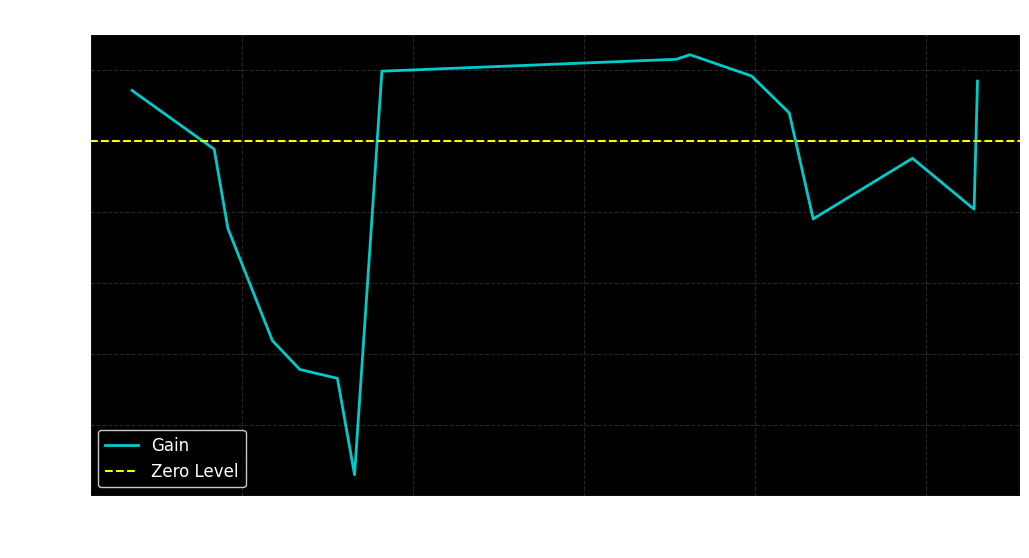

In [302]:
plt.figure(figsize=(12, 6))  # Set figure size

# Set black background
plt.style.use('dark_background')

# Plot the data
df_trades['GAIN_C'].plot(
    color='cyan',       # Bright color for the line
    linewidth=2,        # Thicker line for visibility
    alpha=0.8,          # Slight transparency
    label='Gain'
)

# Add a horizontal line at y=0
plt.axhline(y=0, color='yellow', linestyle='--', linewidth=1.5, label='Zero Level')

# Add titles and labels with contrasting colors
plt.title('Gain Over Time', fontsize=16, color='white')
plt.xlabel('Time', fontsize=14, color='white')
plt.ylabel('Gain', fontsize=14, color='white')

# Customize ticks
plt.xticks(fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')

# Add a legend
plt.legend(fontsize=12, facecolor='black', edgecolor='white')

# Add grid lines with contrasting color
plt.grid(color='gray', linestyle='--', alpha=0.3)

# Show the plot
plt.show()
